In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/labclass-v2-master/datasets/2019_nCoV_data.csv', encoding='utf-8')
data

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
765,766,02/04/2020 22:00:00,"Boston, MA",US,2020-01-02 19:43:00,1.0,0.0,0.0
766,767,02/04/2020 22:00:00,"Los Angeles, CA",US,2020-01-02 19:53:00,1.0,0.0,0.0
767,768,02/04/2020 22:00:00,"Orange, CA",US,2020-01-02 19:53:00,1.0,0.0,0.0
768,769,02/04/2020 22:00:00,"Seattle, WA",US,2020-01-02 19:43:00,1.0,0.0,0.0


# Assignment

- Create and copy this file in folder `BME11`, name your new file's name as your group number (ex: group1.ipynb)
- Visualize data from `datasets/2019_nCoV_data.csv`

2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus.

The data is available from 22 Jan 2020.

source: [kaggle](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset)

## 0. Group Members

Patsuda Iyaraganjanakul (Anoil) 6113083
Apisara Yooyuen (Jaja) 6113099
Chayapitcha Saesue (Mook) 6113075


## 1. Load coronavirus file from `dataset/2019_nCoV_data.csv`

In [0]:
from os import path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score
import seaborn as sns
color = sns.color_palette()
sns.set()

In [0]:
def dp(dataFileName):
    '''
    This function is used to get full data path (dp) from data file name.
    '''
    return path.join('datasets', dataFileName)

## 2. Show dataframe

In [12]:
fileName =('/content/drive/My Drive/Colab Notebooks/labclass-v2-master/datasets/2019_nCoV_data.csv')
df = pd.read_csv(dp(fileName), encoding='utf-8')
df

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
765,766,02/04/2020 22:00:00,"Boston, MA",US,2020-01-02 19:43:00,1.0,0.0,0.0
766,767,02/04/2020 22:00:00,"Los Angeles, CA",US,2020-01-02 19:53:00,1.0,0.0,0.0
767,768,02/04/2020 22:00:00,"Orange, CA",US,2020-01-02 19:53:00,1.0,0.0,0.0
768,769,02/04/2020 22:00:00,"Seattle, WA",US,2020-01-02 19:43:00,1.0,0.0,0.0


## 3. Show how many countries that affected by virus

In [22]:
count_Country= df.groupby(['Country']).size().reset_index(name='counts')
count_Country

,Country,counts
0,Australia,32
1,Belgium,1
2,Brazil,1
3,Cambodia,9
4,Canada,20
5,China,34
6,Finland,7
7,France,12
8,Germany,9
9,Hong Kong,13


In [23]:
count_Country.sort_values(by=['counts'], ascending=False)

,Country,counts
15,Mainland China,398
29,US,60
5,China,34
0,Australia,32
4,Canada,20
13,Japan,14
27,Thailand,14
22,South Korea,14
26,Taiwan,13
21,Singapore,13


## 4. Show and visualize total number of confirmed, deaths & recovered cases in each countries

In [34]:
count_Country= df.groupby(['Country']).sum().drop(['Sno'],axis=1)
count_Country

,Confirmed,Deaths,Recovered
Country,,,
Australia,92.0,0.0,12.0
Belgium,1.0,0.0,0.0
Brazil,0.0,0.0,0.0
Cambodia,9.0,0.0,0.0
Canada,29.0,0.0,0.0
China,549.0,0.0,0.0
Finland,7.0,0.0,0.0
France,55.0,0.0,0.0
Germany,62.0,0.0,0.0


Text(0.5, 1.0, 'Confirmed, deaths, recovered from corona virus')

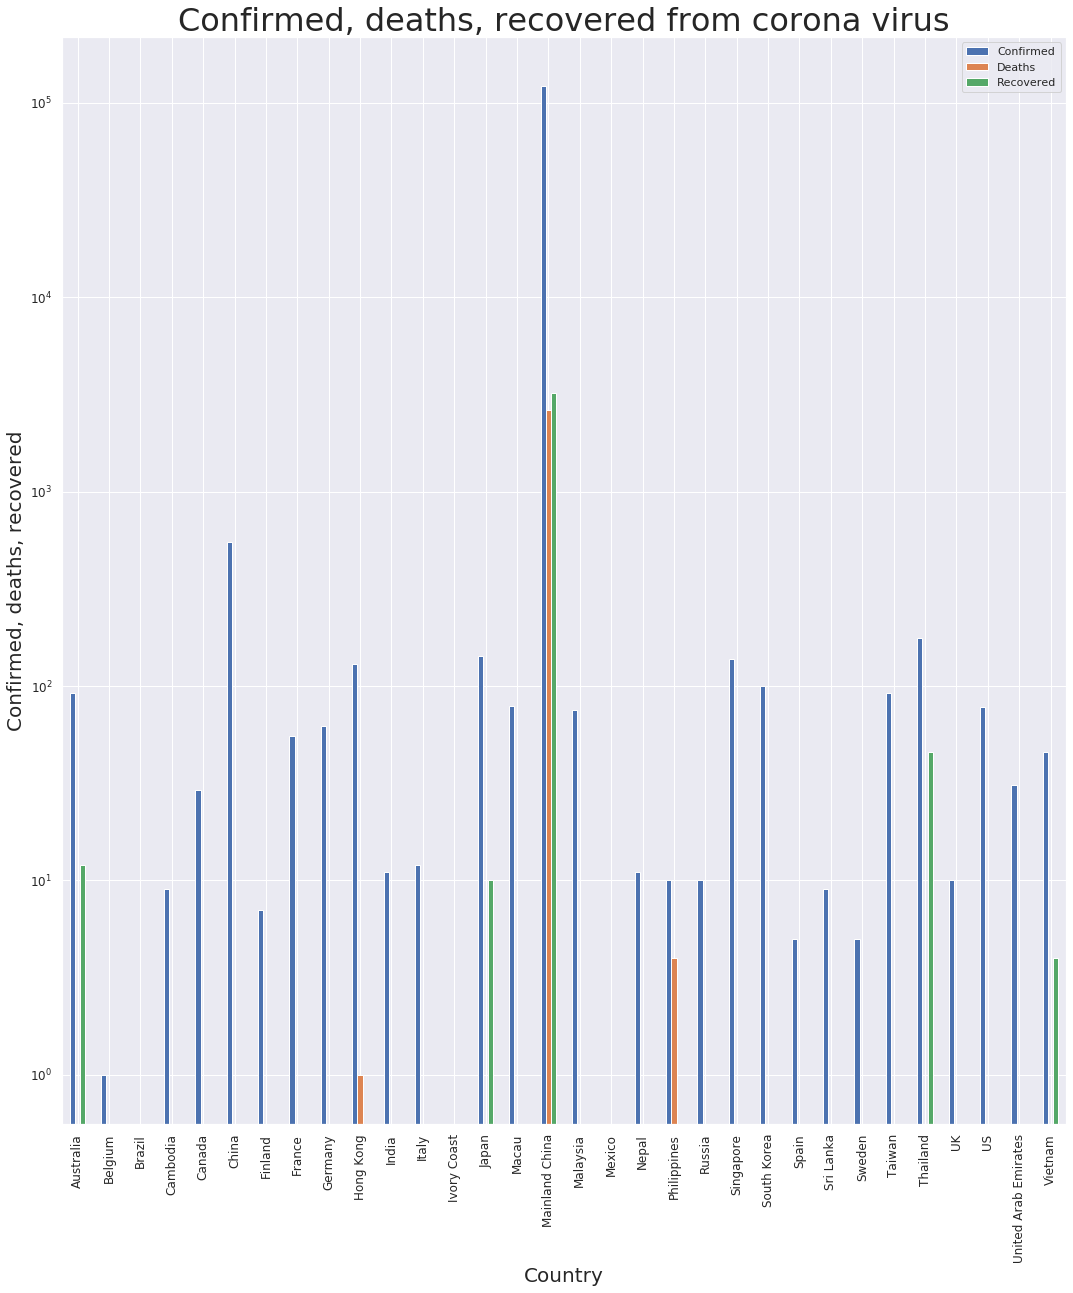

In [38]:
count_Country.plot(kind='bar',figsize=(18,20), fontsize=12,logy=True)
plt.xlabel('Country', fontsize=20)
plt.ylabel('Confirmed, deaths, recovered', fontsize=20)
plt.title('Confirmed, deaths, recovered from corona virus', fontsize=32)

## 5. Show and visualize global spread of the coronavirus over time 

In [40]:
count_Global= df.groupby(['Date']).size().reset_index(name='counts')

count_Global

,Date,counts
0,01/22/2020 12:00:00,38
1,01/23/2020 12:00:00,45
2,01/24/2020 12:00:00,41
3,01/25/2020 22:00:00,44
4,01/26/2020 23:00:00,47
5,01/27/2020 20:30:00,52
6,01/28/2020 23:00:00,52
7,01/29/2020 21:00:00,56
8,01/30/2020 21:30:00,59
9,01/31/2020 19:00:00,63


Text(0.5, 1.0, 'Global spread from corona virus')

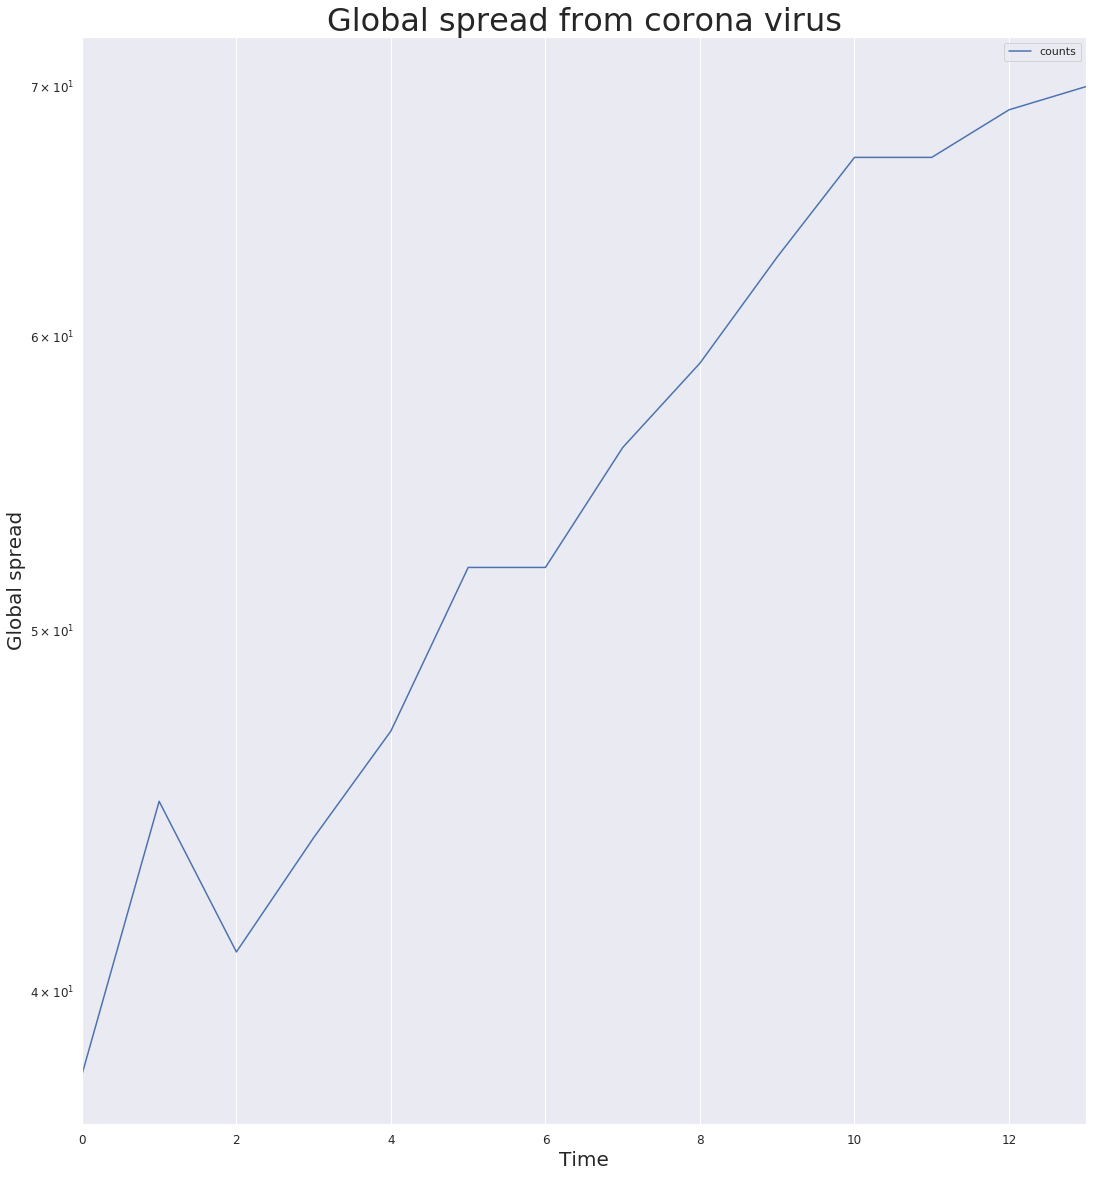

In [41]:
count_Global.plot(kind='line',figsize=(18,20), fontsize=12,logy=True)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Global spread', fontsize=20)
plt.title('Global spread from corona virus', fontsize=32)

## 6. Show dependence between confirmed cases and deaths case

## 7. Show dependence between confirmed cases and recovered case